In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from scipy import stats
sns.set_theme(style='darkgrid', palette='colorblind')
plt.rcParams['figure.figsize'] = (28, 10)
plt.rcParams['font.size'] = 20

In [3]:
# data_dir = pathlib.Path('/lab/processed-data/EXP_JSM002_NGN_DIV18_wholeplate')
# image_data = pd.read_csv(data_dir / 
#                          '2023-01-09_tdp43_analysis'/
#                          '2023-01-09_tdp43_analysisImage.csv')
# soma_data = pd.read_csv(data_dir / 
#                         '2023-01-09_tdp43_analysis'/
#                         '2023-01-09_tdp43_analysiscytoplasm_outlines.csv')
# nuclei_data = pd.read_csv(data_dir / 
#                           '2023-01-09_tdp43_analysis'/
#                           '2023-01-09_tdp43_analysisnuclei.csv')

data_dir = pathlib.Path('/lab/processed-data/EXP_JSM002_NGN2_DIV25_wholeplate')
image_data = pd.read_csv(data_dir / 
                         '2022-12-12_tdp43_analysis'/
                         '2022-12-12_tdp43_analysisImage.csv')
soma_data = pd.read_csv(data_dir / 
                        '2022-12-12_tdp43_analysis'/
                        '2022-12-12_tdp43_analysiscytoplasm_outlines.csv')
nuclei_data = pd.read_csv(data_dir / 
                          '2022-12-12_tdp43_analysis'/
                          '2022-12-12_tdp43_analysisnuclei.csv')

measurement = 'Intensity_IntegratedIntensity_'
channels = ['TDP43_corrected', 'pTDP43_corrected']

ratio_data = pd.DataFrame(index = soma_data.index, 
                          columns = channels)
n_cells = soma_data.shape[0]
ratio_data['row'] = np.zeros(n_cells)
ratio_data['col'] = np.zeros(n_cells)
ratio_data['concentration'] = np.zeros(n_cells)
ratio_data['ImageNumber'] = soma_data['ImageNumber']

# Create ratio data
for ch in channels:
    ratio_data[ch] = ((soma_data[measurement + ch] - 
                       nuclei_data[measurement + ch]) / 
                      nuclei_data[measurement + ch])
    ratio_data[ch].loc[ratio_data['ImageNumber'] == 1] = 1

# Add raw data columns to dataframe
ratio_data['TDP43_nucleus'] = nuclei_data[measurement + channels[0]]
ratio_data['TDP43_cytoplasm'] = (soma_data[measurement + channels[0]] - 
                                 nuclei_data[measurement + channels[0]])
ratio_data['pTDP43_nucleus'] = nuclei_data[measurement + 'p' + channels[0]]
ratio_data['pTDP43_cytoplasm'] = (soma_data[measurement + 'p' + channels[0]] - 
                                  nuclei_data[measurement + 'p' + channels[0]])

# Create lookup table for rows-concentrations
conc_lookup = {'B' : 4e-6,
               'C' : 2e-6,
               'D' : 1e-6,
               'E' : 500e-9,
               'F' : 250e-9,
               'G' : 125e-9}

# Assign each cell a row & column index, and concentration (condition)
for i_cell in np.arange(n_cells):
    # ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][28]
    # ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][29:31]
    ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][25]
    ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][26:28]
    ratio_data['concentration'].iloc[i_cell] = conc_lookup[ratio_data['row'].iloc[i_cell]]


# # Remove first image, which is unlabeled
# ratio_data = ratio_data.drop(index=1)
# n_cells = ratio_data.shape[0]
# ratio_data.index = np.arange(n_cells)

z_ratio_data = ratio_data[channels].copy()
z_ratio_data[channels] = stats.zscore(z_ratio_data, axis=0)
drop_rows = (z_ratio_data > 8).any(axis=1)
ratio_data = ratio_data.drop(index = ratio_data.index[drop_rows])
n_cells = ratio_data.shape[0]
ratio_data.index = np.arange(n_cells)

/tmp/ipykernel_2518/828985734.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data[ch].loc[ratio_data['ImageNumber'] == 1] = 1
/tmp/ipykernel_2518/828985734.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][25]
/tmp/ipykernel_2518/828985734.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'

In [4]:
ratio_data

,TDP43_corrected,pTDP43_corrected,row,col,concentration,ImageNumber
0,1.000000,1.000000,B,02,4.000000e-06,1
1,1.000000,1.000000,B,02,4.000000e-06,1
2,1.000000,1.000000,B,02,4.000000e-06,1
3,1.000000,1.000000,B,02,4.000000e-06,1
4,1.000000,1.000000,B,02,4.000000e-06,1
...,...,...,...,...,...,...
2916,1.328149,1.319653,G,11,1.250000e-07,60
2917,2.591544,1.979542,G,11,1.250000e-07,60
2918,1.100315,1.128475,G,11,1.250000e-07,60
2919,1.232946,1.018492,G,11,1.250000e-07,60


Text(0.5, 0.98, 'All wells (independently) in cols 2 & 7')

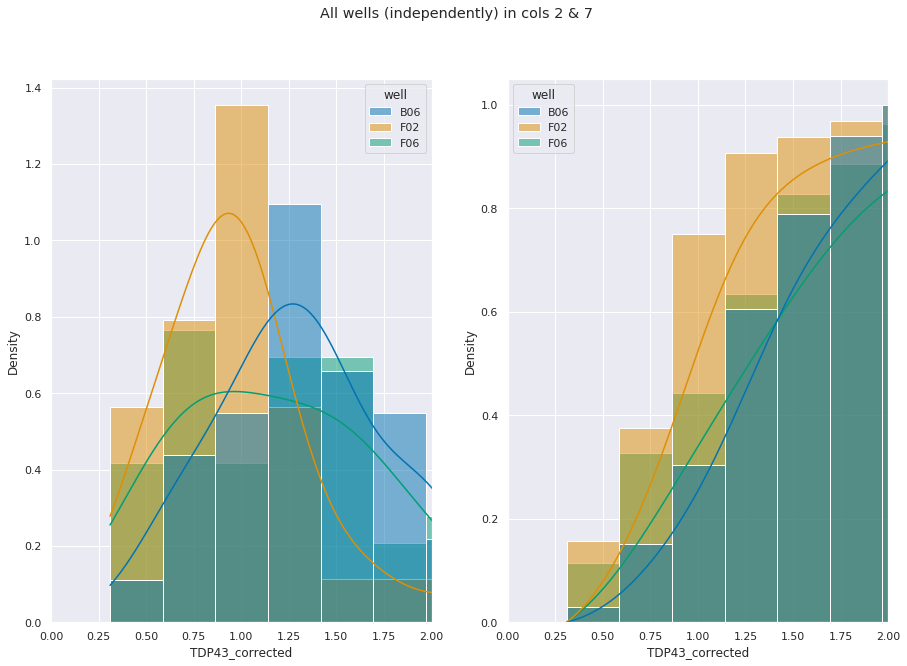

In [32]:
data = ratio_data.query('col==["02","06"]')
data = data.query('row==["B","F"]')
data['well'] = data['row'] + data['col']
data = data.drop(data.index[data['ImageNumber']==1]).drop(data.index[data['ImageNumber']==51])
fig, axs = plt.subplots(1,2)
# sns.histplot(ax=axs[0], data=data, x='TDP43_corrected', hue='col', kde=True, common_bins=True, stat='density', common_norm=False)
sns.histplot(ax=axs[0], data=data, x='TDP43_corrected', hue='well', kde=True, common_bins=True, stat='density', common_norm=False)
axs[0].set_xlim([0, 2])
sns.histplot(ax=axs[1], data=data, x='TDP43_corrected', hue='well', kde=True, common_bins=True, stat='density', common_norm=False, cumulative=True)
plt.xlim([0, 2])
# plt.suptitle('Cols 2 & 7, pooled within col')
plt.suptitle('All wells (independently) in cols 2 & 7')

/tmp/ipykernel_4994/3437663363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['well'] = data['row'] + data['col']
/tmp/ipykernel_4994/3437663363.py:7: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.lineplot(data, x='concentration', y=channels[0], hue='col', palette=pal, errorbar='se')


(0, 2.5)

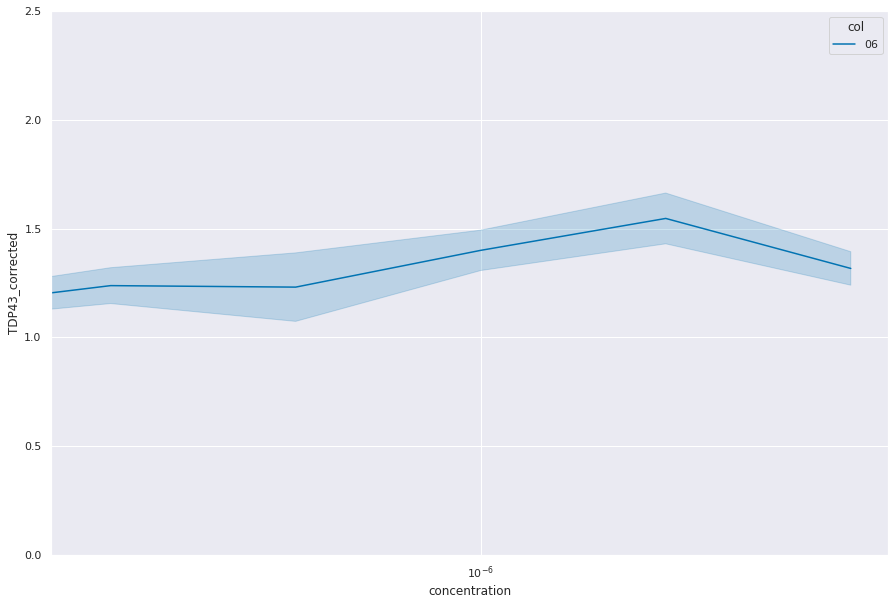

In [36]:
sns.set_theme(style='darkgrid', palette='colorblind')
pal = sns.color_palette("colorblind").as_hex()
plt.rcParams['figure.figsize'] = (15, 10)
# data = ratio_data.query('col==["02","06","07","11"]')
data = ratio_data.query('col==["06"]')
data['well'] = data['row'] + data['col']
sns.lineplot(data, x='concentration', y=channels[0], hue='col', palette=pal, errorbar='se')
# sns.regplot(data, x='concentration', y=channels[0])
plt.xscale('log', basex=10)
plt.xlim([200e-9, 4.6e-6])
plt.ylim([0, 2.5])

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [28]:
def logistic(x, L, k, x_0):
    return L / (1 + np.exp(-k * (x - x_0)))

In [31]:
x_data = data['concentration']
y_data = data[channels[0]]
popt, pcov = curve_fit(logistic, x_data, y_data)

(0, 2.5)

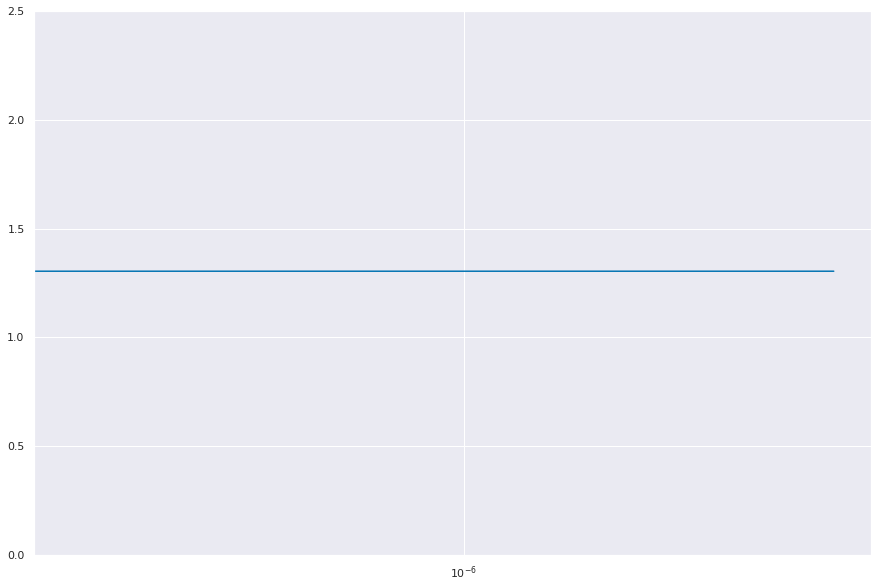

In [35]:
x = data['concentration'].unique()
y_pred = plt.plot(x,
                  logistic(x, popt[0], popt[1], popt[2]))
plt.xscale('log', basex=10)
plt.xlim([200e-9, 4.6e-6])
plt.ylim([0, 2.5])

In [40]:
concentration_lookup = {'B' : 4e-6,
                        'C' : 2e-6,
                        'D' : 1e-6,
                        'E' : 500e-9,
                        'F' : 250e-9,
                        'G' : 125e-9
                        }
# data['concentration'] = 

In [41]:
concentration_lookup

{'B': 4e-06, 'C': 2e-06, 'D': 1e-06, 'E': 5e-07, 'F': 2.5e-07}

In [44]:
[4e-06/(2**x) for x in np.arange(6)]

[4e-06, 2e-06, 1e-06, 5e-07, 2.5e-07, 1.25e-07]

In [45]:
ratio_data

,TDP43_corrected,pTDP43_corrected,row,col,ImageNumber
0,1.000000,1.000000,B,02,1
1,1.000000,1.000000,B,02,1
2,1.000000,1.000000,B,02,1
3,1.000000,1.000000,B,02,1
4,1.000000,1.000000,B,02,1
...,...,...,...,...,...
2916,1.328149,1.319653,G,11,60
2917,2.591544,1.979542,G,11,60
2918,1.100315,1.128475,G,11,60
2919,1.232946,1.018492,G,11,60


In [49]:
concentration_lookup[ratio_data['row'].iloc[1]]

4e-06